<a href="https://colab.research.google.com/github/hersan19/Inteligencia_computacional/blob/main/Ejemplo_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo algoritmo genético para la solución del problema del viajero

Se instala la biblioteca DEAP (Distributed Evolutionary Algorithms in Python).

Para más información acerca de la biblioteca consultar la documentación en el siguiente link.

https://deap.readthedocs.io/en/master/index.html


In [1]:
pip install deap

     |████████████████████████████████| 160 kB 19.2 MB/s 


Se importan las bibliotecas que se utilizarán para este ejemplo

In [2]:
import array
import random
import json
import numpy
from deap import algorithms,base,creator,tools
import pandas as pd
import numpy as np

# **Funciones**

Para la solución del problema se implementa la función "Euclidian", la cual realiza el cálculo de la distancia entre dos puntos.

Especificamente, se realiza el cáluclo de la distancia euclidiana entre dos coordenadas geográficas.

In [3]:
import math
def Euclidian(X, Y):
    return math.sqrt( (float(X[1])-float(Y[1]))**2 + (float(X[0])-float(Y[0]))**2)
    


Se implementa la función "Distances".

Esta función realiza el cálculo de la distancia total de un ciurcuito al pasar por todas las capitales. 
Es decir, se obtiene el costo total de cada uno de los circuitos o posibles soluciones. 

In [4]:
def Distances(cities):
    r= len(cities)
    M=np.zeros((r,r))
    for i in range(r-1):
        for j in range(i+1, r):
            M[i][j] = Euclidian(cities[i], cities[j])
            M[j][i]= M[i][j]
    return M

Se obtienen las coordenadas geográficas de las capitales de cada uno de los estados de la república mexicana.

Cada ciudad cuenta con los valores de "latitud" y "longitud"

In [5]:
url="https://raw.githubusercontent.com/hersan19/EMC_2021/main/ciudades.csv?token=AMUQEUUNCZHPLVM2N6WHX5DBBKZ4S"
df_ciudades=pd.read_csv(url)
datas = list(zip(list(df_ciudades.latitud), list(df_ciudades.longitud)))

Creación de diccionario para relacionar el indice con el nombre de la ciudad

In [12]:
diccionario=df_ciudades["ciudad"]
diccionario=diccionario.to_dict()


# Configuración inicial de DEAP

Se implementa el algoritmo completo utilizando la biblioteca DEAP, la cual permite utilizar una representación para la solución del problema.

La representación es la siguiente:

[2, 7, 8, 1, 3, 9, 4, 5, 6, 0]

In [7]:
# Asignaciones de las distancias
distance_map =Distances(datas)
IND_SIZE = len(datas) # Número de ciudades a recorrer

# Se crea la clase "Individual" usando "creator" como herramienta. 
# La clase "Individual" es una arreglo y tiene como atributo "FitnessMin" el cual será su aptitud.
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # El parámetro "weights=-1.0" establece que es una minimización 
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)
# Caja de herramientas para inicializar los individuos

# Toolbox.register crea un alias para una función.
toolbox = base.Toolbox()

# Generador de circuitos.
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)  
# El individuo llamado "individual", toma las características de aptitud.
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) 
# La población es el conjunto de "n" individuos.
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Se declara la función encargada de evaluar los individuos.
def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

# Se configuran los parámetros de cruza, mutación, el método de selección y se agrega al toolbox la función encaraga de evaluar a la población.
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)




# Algoritmo general
Se definen los parámetros para el algoritmo genético, así como se agregan elementos al toolbox para guardar las estadísticas del proceso de búsqueda.

In [8]:
def main(): # algoritmo principal
    #random.seed(0)
    # Parámetros del algoritmo genético
    numero_individuos=100
    p_cruza=0.8
    p_mutacion=0.5
    generaciones=100
    # Creación de la población
    pop = toolbox.population(n=numero_individuos)
    # hof (Hall Of Fame) se guarda el mejor individuo que siempre ha existido durante todo el proceso evolutivo
    hof = tools.HallOfFame(1)
    # Se agrega "tools.Statistics" para guardar las estadísticas de las aptitudes del proceso evolutivo
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    # Se configura el algoritmo evolutivo
    pop,log=algorithms.eaSimple(pop, toolbox, p_cruza, p_mutacion, generaciones, stats=stats, 
                        halloffame=hof,verbose=True)
    
    return pop, log,hof

In [9]:
pop,estadisticas,mejor=main()

gen	nevals	avg    	std    	min    	max    
0  	100   	264.098	17.2392	218.657	309.008
1  	83    	254.786	18.5676	196.912	299.837
2  	88    	249.595	21.0081	196.912	290.156
3  	86    	244.006	20.7618	196.912	292.247
4  	91    	240.787	21.7228	193.215	287.569
5  	92    	238.353	20.6297	184.568	291.379
6  	92    	236.254	20.7551	184.659	282.158
7  	90    	238.699	24.4914	197.416	313.568
8  	91    	236.502	21.6646	183.898	288.972
9  	94    	240.461	21.8006	193.637	297.09 
10 	90    	237.445	22.237 	170.722	293.919
11 	89    	235.923	23.5817	170.722	288.478
12 	87    	233.659	23.0363	177.079	310.186
13 	93    	231.535	22.5804	177.079	277.015
14 	93    	229.933	25.654 	174.609	295.164
15 	95    	225.066	20.5884	170.391	285.352
16 	92    	224.107	25.1352	162.587	294.943
17 	83    	223.932	24.3762	162.587	278.938
18 	90    	224.293	22.3051	162.587	284.04 
19 	89    	220.804	22.3967	162.587	274.816
20 	94    	219.066	23.7771	162.587	279.301
21 	91    	221.261	25.8772	164.995	282.907
22 	93    	

Se obtiene el mejor individuo que se encontró en el proceso de búsqueda

In [10]:
mejor[0]


Individual('i', [22, 30, 26, 5, 10, 27, 24, 2, 1, 25, 4, 7, 13, 0, 23, 21, 12, 28, 20, 14, 16, 11, 31, 6, 18, 8, 17, 15, 9, 29, 19, 3])

Se realiza la decodificación del mejor individuo mediante el uso del diccionario previamente definido. 

De esta manera se obtienen los nombres de cada una de las capitales del mejor recorrido encontrado.

In [13]:
recorrido_nombres=[]
aux=0
for ciudad in mejor[0]:  
  recorrido_nombres.append(diccionario.get(ciudad,ciudad))
recorrido_nombres.append(diccionario.get(mejor[0][0]))
recorrido_nombres

['chetumal',
 'merida',
 'villahermosa',
 'tuxtlaGtz',
 'chilpancingo',
 'cuidadvictoria',
 'culiacan',
 'lapaz',
 'mexicalli',
 'hermosillo',
 'chihuahua',
 'colima',
 'guadalajara',
 'aguascalientes',
 'Sanluis',
 'queretaro',
 'pachuca',
 'tlaxcala',
 'puebla',
 'toluca',
 'cuernavaca',
 'cdmx',
 'zacatecas',
 'Saltillo',
 'monterrey',
 'victoriaDurango',
 'tepic',
 'morelia',
 'guanajuato',
 'xalapa',
 'oaxaca',
 'campeche',
 'chetumal']

En este apartado se decodifica el mejor individuo en términos de las coordenadas geograficas de cada una de las capitales, con el fin de obtener colocarlas en el mapa.

In [14]:
recorrido=[]
for i in range(32):
  latitud=df_ciudades.iloc[mejor[0][i]]["latitud"]
  longitud=df_ciudades.iloc[mejor[0][i]]["longitud"]
  recorrido.append((latitud,longitud))

In [19]:
import plotly.express as px
import plotly.graph_objects as go

fig=go.Figure()
# Se agregan los puntos que representan la ubicación de las capitales
fig.add_trace(go.Scattergeo(
    #locations = ["Mexico"],
    #locationmode = 'country names',
    lon=df_ciudades["longitud"],
    lat=df_ciudades["latitud"],
    hoverinfo="text",
    hovertext=df_ciudades["ciudad"],
    #text=df_ciudades["ciudad"],
    mode="markers",
    marker = dict(size=2,color='rgb(255,0,0)',line=dict(width=3,color='rgba(68,68,0)'))))

# Ciclo para realizar la unión de los puntos de acuerdo con el mejor individuo 
for i in range(31):
  fig.add_trace(go.Scattergeo(
      lat=[recorrido[i][0],recorrido[i+1][0]],
      lon=[recorrido[i][1],recorrido[i+1][1]],
      mode="lines",
      line=dict(width=1,color="blue"),
  ))
fig.add_trace(go.Scattergeo(
    lat=[recorrido[-1][0],recorrido[0][0]],
    lon=[recorrido[-1][1],recorrido[0][1]],
    mode="lines",
    line=dict(width=1,color="blue"),
  ))

fig.update_layout(title_text="Mejor recorrido",showlegend=True,
                  geo =dict(
                      #showcountries=True,
                      scope="north america",
                      projection_type ='conic equal area',                      
                      showland = True,
                      #landcolor='rgb(243,243,243)',
                      #countrycolor='rgb(204,204,204)',
                  ), width=1800, height=1400)
fig.show()

Se imprimen los resultados obtenidos junto con la gráfica del proceso evolutivo.

En la gráfica se muestran el promedio de aptitud de toda la población (línea azul), la máxima aptitud (línea naranja) y la máxima (línea verde)

Mejor individuo es: Individual('i', [22, 30, 26, 5, 10, 27, 24, 2, 1, 25, 4, 7, 13, 0, 23, 21, 12, 28, 20, 14, 16, 11, 31, 6, 18, 8, 17, 15, 9, 29, 19, 3])
['chetumal', 'merida', 'villahermosa', 'tuxtlaGtz', 'chilpancingo', 'cuidadvictoria', 'culiacan', 'lapaz', 'mexicalli', 'hermosillo', 'chihuahua', 'colima', 'guadalajara', 'aguascalientes', 'Sanluis', 'queretaro', 'pachuca', 'tlaxcala', 'puebla', 'toluca', 'cuernavaca', 'cdmx', 'zacatecas', 'Saltillo', 'monterrey', 'victoriaDurango', 'tepic', 'morelia', 'guanajuato', 'xalapa', 'oaxaca', 'campeche', 'chetumal']
con aptitud de : (111.92300584552925,)


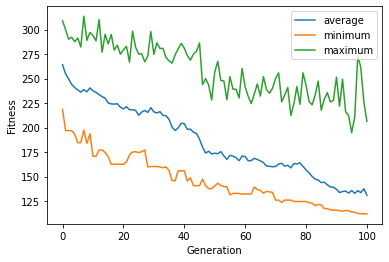

In [20]:
print("Mejor individuo es: %s\n%s\ncon aptitud de : %s" % (mejor[0],recorrido_nombres, mejor[0].fitness))
    
import matplotlib.pyplot as plt
gen, avg, min_, max_ = estadisticas.select("gen", "avg", "min", "max")
plt.plot(gen, avg, label="average")
plt.plot(gen, min_, label="minimum")
plt.plot(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="upper right")


plt.rcParams["figure.figsize"] = (10,10)
plt.show()
